In [1]:
import gymnasium as gym

import gym_pusht
import numpy as np
import matplotlib.pyplot as plt

# import stable_baselines3 as sb3
import time
import torch

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
observation, info = env.reset()
plt.imshow(env.render())

episode_over = False
while not episode_over:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    time.sleep(0.01)
    episode_over = terminated | truncated
env.close()

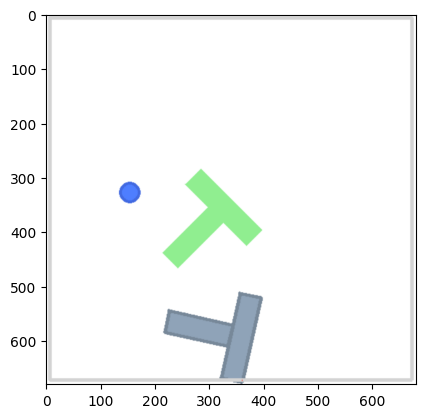

In [11]:
env = gym.make(
    "gym_pusht/PushT-v0", obs_type="pixels_agent_pos", render_mode="rgb_array"
)
observation, info = env.reset()
plt.imshow(env.render())
# env = ScaleRewardWrapper(env)

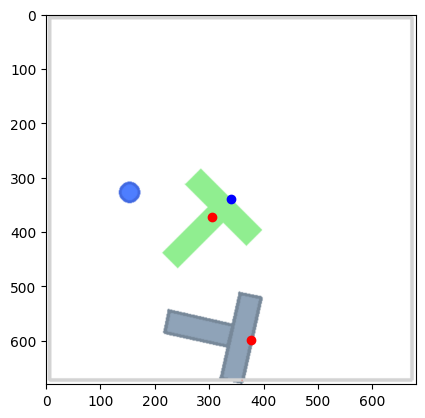

In [16]:
fig, ax = plt.subplots(1, 1)
ax.imshow(env.render())
# Set axis
ax.set_xlim([0, 680])
ax.set_ylim([680, 0])
ax.set_aspect("equal")
ax.plot(
    info["block_pose"][0] / 512 * 680, info["block_pose"][1] / 512 * 680, "ro"
)
ax.plot(
    256 / 512 * 680, 256 / 512 * 680, "bo"
)  # agent position is at the center of the image
ax.plot(230 / 512 * 680, 280 / 512 * 680, "ro")

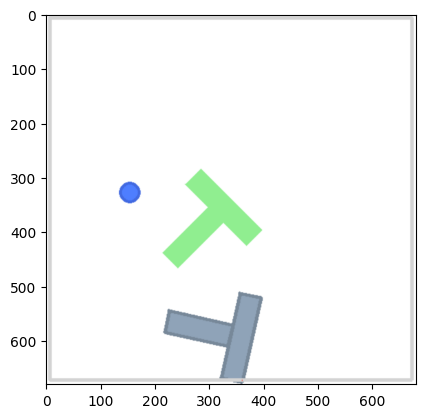

In [13]:
plt.imshow(env.render())

In [ ]:
info.keys()

In [ ]:
# import pygame

# class Coverage:
#     def __init__(self, info):
#         self.info = info
#         self.goal_pose = np.array([256, 256, np.pi / 4])
#         self.space = pymunk.Space()
#         self.space.gravity = 0, 0
#         self.space.damping =  0.0
#         self.teleop = False

#         # Add walls
#         walls = [
#             self.add_segment(self.space, (5, 506), (5, 5), 2),
#             self.add_segment(self.space, (5, 5), (506, 5), 2),
#             self.add_segment(self.space, (506, 5), (506, 506), 2),
#             self.add_segment(self.space, (5, 506), (506, 506), 2),
#         ]
#         self.space.add(*walls)
#         self.block, self.block_shapes = self.add_tee(self.space, (256, 300), 0)

#     @staticmethod
#     def get_goal_pose_body(pose):
#         mass = 1
#         inertia = pymunk.moment_for_box(mass, (50, 100))
#         body = pymunk.Body(mass, inertia)
#         # preserving the legacy assignment order for compatibility
#         # the order here doesn't matter somehow, maybe because CoM is aligned with body origin
#         body.position = pose[:2].tolist()
#         body.angle = pose[2]
#         return body

#     @staticmethod
#     def add_segment(space, a, b, radius):
#         # TODO(rcadene): rename add_segment to make_segment, since it is not added to the space
#         shape = pymunk.Segment(space.static_body, a, b, radius)
#         shape.color = pygame.Color("LightGray")  # https://htmlcolorcodes.com/color-names
#         return shape

#     @staticmethod
#     def add_tee(space, position, angle, scale=30, color="LightSlateGray", mask=None):
#         if mask is None:
#             mask = pymunk.ShapeFilter.ALL_MASKS()
#         mass = 1
#         length = 4
#         vertices1 = [
#             (-length * scale / 2, scale),
#             (length * scale / 2, scale),
#             (length * scale / 2, 0),
#             (-length * scale / 2, 0),
#         ]
#         inertia1 = pymunk.moment_for_poly(mass, vertices=vertices1)
#         vertices2 = [
#             (-scale / 2, scale),
#             (-scale / 2, length * scale),
#             (scale / 2, length * scale),
#             (scale / 2, scale),
#         ]
#         inertia2 = pymunk.moment_for_poly(mass, vertices=vertices1)
#         body = pymunk.Body(mass, inertia1 + inertia2)
#         shape1 = pymunk.Poly(body, vertices1)
#         shape2 = pymunk.Poly(body, vertices2)
#         shape1.color = pygame.Color(color)
#         shape2.color = pygame.Color(color)
#         shape1.filter = pymunk.ShapeFilter(mask=mask)
#         shape2.filter = pymunk.ShapeFilter(mask=mask)
#         body.center_of_gravity = (shape1.center_of_gravity + shape2.center_of_gravity) / 2
#         body.angle = angle
#         body.position = position
#         body.friction = 1
#         space.add(body, shape1, shape2)
#         return body, [shape1, shape2]

#     def get_coverage(self):
#         goal_body = self.get_goal_pose_body(self.goal_pose)
#         goal_geom = pymunk_to_shapely(goal_body, self.block.shapes)
#         block_geom = pymunk_to_shapely(self.block, self.block.shapes)
#         intersection_area = goal_geom.intersection(block_geom).area
#         goal_area = goal_geom.area
#         return intersection_area / goal_area

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.imshow(env.render())
ax.plot(
    info["block_pose"][0] / 512 * 680, info["block_pose"][1] / 512 * 680, "ro"
)
ax.plot(
    256 / 512 * 680, 256 / 512 * 680, "bo"
)  # agent position is at the center of the image
ax.plot(230 / 512 * 680, 280 / 512 * 680, "ro")

In [ ]:
env = gym.make(
    "gym_pusht/PushT-v0", obs_type="pixels_agent_pos", render_mode="rgb_array"
)
observation, info = env.reset()
plt.imshow(env.render())

In [ ]:
# env = ScaleRewardWrapper(env)
fig, ax = plt.subplots(1, 1)
ax.imshow(env.render())
ax.plot(
    info["block_pose"][0] / 512 * 680, info["block_pose"][1] / 512 * 680, "ro"
)
ax.plot(
    256 / 512 * 680, 256 / 512 * 680, "bo"
)  # agent position is at the center of the image

In [ ]:
info

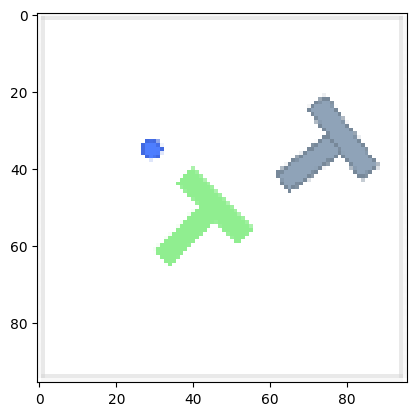

In [3]:
s, r, t, trunc, inf = env.step(env.action_space.sample())
plt.imshow(s["pixels"])

In [ ]:
inf

In [ ]:
import pymunk
from pymunk.vec2d import Vec2d
import numpy as np
from shapely.geometry import Polygon, MultiPolygon


def pymunk_to_shapely(body, shapes):
    geoms = []
    for shape in shapes:
        if isinstance(shape, pymunk.shapes.Poly):
            verts = [
                body.local_to_world(v.rotated(body.angle))
                for v in shape.get_vertices()
            ]
            verts += [verts[0]]  # Close the polygon
            geoms.append(Polygon(verts))
        else:
            raise RuntimeError(f"Unsupported shape type {type(shape)}")
    if len(geoms) == 1:
        return geoms[0]
    return MultiPolygon(geoms)


def create_t_shape(position, angle, scale=30):
    mass = 1
    length = 4
    vertices1 = [
        Vec2d(-length * scale / 2, scale),
        Vec2d(length * scale / 2, scale),
        Vec2d(length * scale / 2, 0),
        Vec2d(-length * scale / 2, 0),
    ]
    vertices2 = [
        Vec2d(-scale / 2, scale),
        Vec2d(-scale / 2, length * scale),
        Vec2d(scale / 2, length * scale),
        Vec2d(scale / 2, scale),
    ]
    inertia1 = pymunk.moment_for_poly(mass, vertices=vertices1)
    inertia2 = pymunk.moment_for_poly(mass, vertices=vertices2)
    body = pymunk.Body(mass, inertia1 + inertia2)
    shape1 = pymunk.Poly(body, vertices1)
    shape2 = pymunk.Poly(body, vertices2)
    body.position = Vec2d(*position)  # Corrected to unpack the tuple
    body.angle = angle
    return body, [shape1, shape2]


def calculate_coverage(block_pos, block_angle, goal_pos, goal_angle, scale=30):
    block_body, block_shapes = create_t_shape(block_pos, block_angle, scale)
    goal_body, goal_shapes = create_t_shape(goal_pos, goal_angle, scale)

    block_geom = pymunk_to_shapely(block_body, block_shapes)
    goal_geom = pymunk_to_shapely(goal_body, goal_shapes)

    intersection_area = block_geom.intersection(goal_geom).area
    goal_area = goal_geom.area
    coverage = intersection_area / goal_area

    return coverage


# Example use:
block_position = (
    inf["block_pose"][0],
    inf["block_pose"][1],
)  # Example block position
block_angle = inf["block_pose"][2]  # Example block angle in radians
block_angle = np.pi / 4  # Example block angle in radians
goal_position = (256, 256)  # Example goal position
goal_angle = np.pi / 4  # Example goal angle in radians

coverage = calculate_coverage(
    block_position, block_angle, goal_position, goal_angle
)
print(f"Coverage: {coverage:.2f}")

In [ ]:
import numpy as np
import shapely.geometry as sg
import pymunk
from pymunk.vec2d import Vec2d


def compute_coverage(info):
    # Extract the necessary information from the dictionary
    block_pose = info["block_pose"]
    goal_pose = info["goal_pose"]

    # Create a pymunk body for the block and the goal
    block_body = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    block_body.position = tuple(block_pose[:2])  # Convert numpy array to tuple
    block_body.angle = block_pose[2]

    goal_body = pymunk.Body(body_type=pymunk.Body.KINEMATIC)
    goal_body.position = tuple(goal_pose[:2])  # Convert numpy array to tuple
    goal_body.angle = goal_pose[2]

    # Create a shapely polygon for the block and the goal
    block_shape = pymunk.Poly.create_box(block_body, size=(50, 100))
    goal_shape = pymunk.Poly.create_box(goal_body, size=(50, 100))

    block_geom = pymunk_to_shapely(block_body, [block_shape])
    goal_geom = pymunk_to_shapely(goal_body, [goal_shape])

    # Compute the intersection area and the goal area
    intersection_area = goal_geom.intersection(block_geom).area
    goal_area = goal_geom.area

    # Compute the coverage
    coverage = intersection_area / goal_area

    return coverage


def pymunk_to_shapely(body, shapes):
    geoms = []
    for shape in shapes:
        if isinstance(shape, pymunk.shapes.Poly):
            verts = [body.local_to_world(v) for v in shape.get_vertices()]
            verts += [verts[0]]
            geoms.append(sg.Polygon(verts))
        else:
            raise RuntimeError(f"Unsupported shape type {type(shape)}")
    geom = sg.MultiPolygon(geoms)
    return geom


coverage = compute_coverage(inf)
print(f"Coverage: {coverage:.2f}")

In [ ]:
test = {
    "block_pose": np.array([256, 256, 3 * np.pi / 16]),
    "goal_pose": np.array([256, 256, np.pi / 4]),
}

compute_coverage(test)

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def goal_map_visualisation(goal_pose, achieved_goals, num_refinement, num_rollout, save_path=None):
    """Visualisation of the behavioral goal vs. the trajectory of achieved goals during a rollout.
    
    Specific to Push-T task (width/height = 680, action space = 512).
    Args:
        - goal_pose (array): the goal to reach
        - achieved_goals (list of arrays): the achieved goals during the rollout
    """
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)

    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1])
    cax = fig.add_subplot(gs[2])

    # Plot the goal_pose
    ax0.plot(
        goal_pose[0] / 512 * 680, goal_pose[1] / 512 * 680, "ro"
    )
    ax0.set_xlim([0, 680])
    ax0.set_ylim([680, 0])
    ax0.set_aspect("equal")
    ax0.set_title("Behavioral goal used for rollout generation")

    # Plot the achieved goals with gradient color
    num_goals = len(achieved_goals)
    colors = [(i / num_goals, 0, 1.0 - i / num_goals) for i in range(num_goals)]
    for i, achieved_goal in enumerate(achieved_goals):
        ax1.plot(
            achieved_goal[0] / 512 * 680, achieved_goal[1] / 512 * 680,
            color=colors[i], marker='o'
        )
    ax1.set_xlim([0, 680])
    ax1.set_ylim([680, 0])
    ax1.set_aspect("equal")
    ax1.set_title("Trajectory of achieved goals during rollout")

    # Create colorbar as a legend
    norm = mpl.colors.Normalize(vmin=0, vmax=num_goals-1)
    sm = mpl.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])

    # Add the colorbar to the plot
    cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
    cbar.set_label('Gradient Scale')
    cbar.set_ticks([0, num_goals-1])
    cbar.set_ticklabels(['Start: t=0', 'End: t=H'])

    fig.suptitle(f"Goal map visualisation (refinement={num_refinement}, rollout={num_rollout})", fontsize=16)
    name = f"goal_map_visualisation_{num_refinement}_{num_rollout}.png"
    fig.savefig(save_path+name) if save_path else ValueError("Please provide a save path.")

In [33]:
goal_pose = [200, 300]
achieved_goals = [
    [100, 150],
    [150, 200],
    [200, 250],
    [250, 300],
    [300, 350],
]

goal_map_visualisation(goal_pose, achieved_goals)

TypeError: goal_map_visualisation() missing 2 required positional arguments: 'num_refinement' and 'num_rollout'

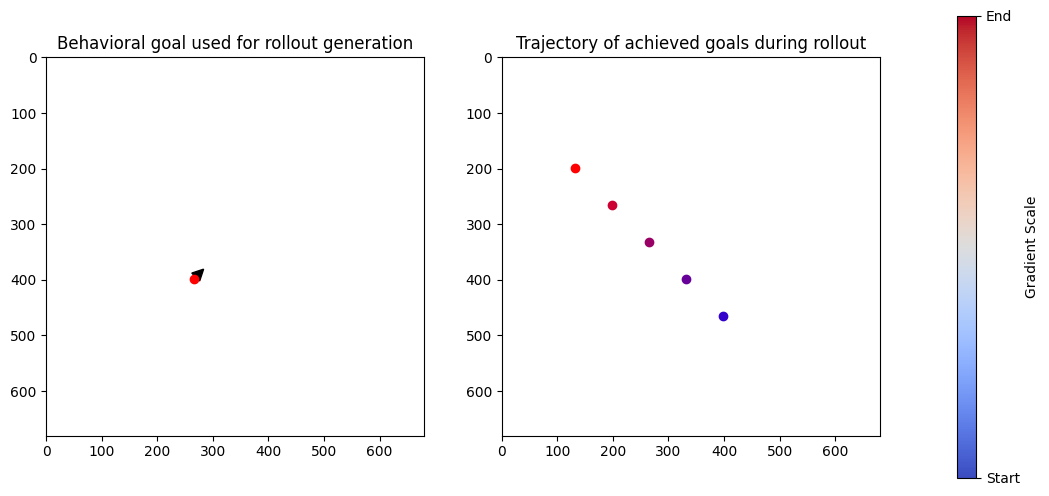

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import numpy as np

def create_plot(goal_pose, achieved_goals, angle_rad):
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)

    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1])
    cax = fig.add_subplot(gs[2])

    # Plot the goal_pose
    goal_x = goal_pose[0] / 512 * 680
    goal_y = goal_pose[1] / 512 * 680
    ax0.plot(goal_x, goal_y, "ro")

    # Calculate the end point of the arrow based on the angle
    arrow_length = 5  # You can adjust the length of the arrow
    ax0.arrow(
        goal_x,
        goal_y,
        arrow_length * np.cos(angle_rad),
        - arrow_length * np.sin(angle_rad),
        head_width=20,
        head_length=20,
        fc="k",
        ec="k",
    )

    ax0.set_xlim([0, 680])
    ax0.set_ylim([680, 0])
    ax0.set_aspect("equal")
    ax0.set_title("Behavioral goal used for rollout generation")

    # Plot the achieved goals with gradient color
    num_goals = len(achieved_goals)
    colors = [(1.0 - i / num_goals, 0, i / num_goals) for i in range(num_goals)]
    for i, achieved_goal in enumerate(achieved_goals):
        ax1.plot(
            achieved_goal[0] / 512 * 680, achieved_goal[1] / 512 * 680,
            color=colors[i], marker='o'
        )
    ax1.set_xlim([0, 680])
    ax1.set_ylim([680, 0])
    ax1.set_aspect("equal")
    ax1.set_title("Trajectory of achieved goals during rollout")

    # Create colorbar as a legend
    norm = mpl.colors.Normalize(vmin=0, vmax=num_goals-1)
    sm = mpl.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])

    # Add the colorbar to the plot
    cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
    cbar.set_label('Gradient Scale')
    cbar.set_ticks([0, num_goals-1])
    cbar.set_ticklabels(['Start', 'End'])

    plt.show()

# Example usage
goal_pose = [200, 300]
achieved_goals = [
    [100, 150],
    [150, 200],
    [200, 250],
    [250, 300],
    [300, 350],
]
angle_rad = np.pi / 4 # Example angle in radians

# Create the plot
create_plot(goal_pose, achieved_goals, angle_rad)